In [88]:
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

In [89]:
iris = sns.load_dataset('iris')

## Séparation features & target

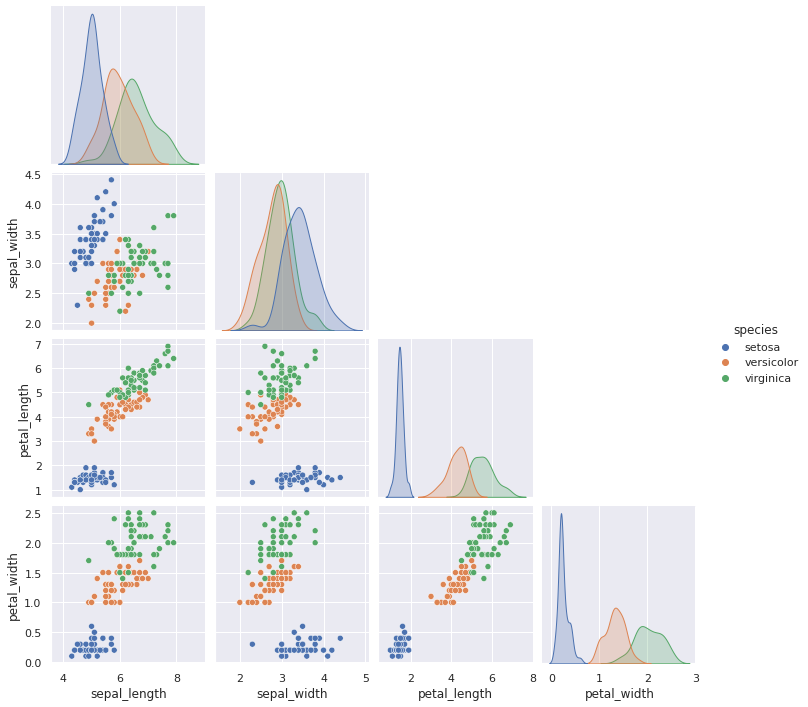

In [90]:
classes = iris['species'].astype('category').cat.categories.tolist()
Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis="columns")

sns.pairplot(iris, hue='species', corner=True)

## Train test split

In [91]:
splits = train_test_split(X,Y, random_state=3, stratify=Y)
x_tr, x_te, y_tr, y_te = splits

## Création et calibration du PCA

In [92]:
pca = PCA()

# Calibre le PCA
pca.fit(x_tr)

PCA()

## Transformation

In [93]:
x_tr_PCA = pca.transform(x_tr)
x_te_PCA = pca.transform(x_te)

In [94]:
iris_PCA = pd.DataFrame(data=x_tr_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])
iris_PCA['target'] = y_tr

---
## Uniquement pour la visualisation

In [95]:
data_PCA = np.append(x_tr_PCA, y_tr.to_numpy().reshape(-1, 1), axis=1)
iris_PCA = pd.DataFrame(data=data_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'TARGET'])

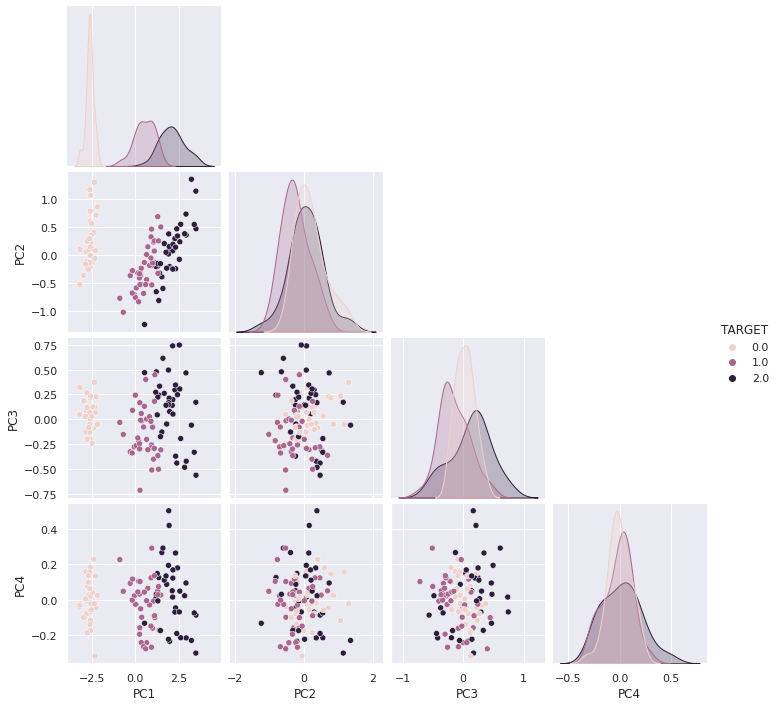

In [96]:
sns.pairplot(iris_PCA, hue='TARGET', corner=True)

---

---
## Comment choisir le nombre de PC

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC')

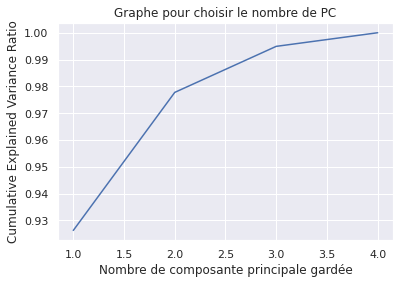

In [97]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1, 2, 3, 4], cumsum)
plt.xlabel('Nombre de composante principale gardée')
plt.ylabel('Cumulative Explained Variance Ratio') # Ratio d'Informations (==variance) Conservees
plt.title('Graphe pour choisir le nombre de PC')

---

In [98]:
pca = PCA(n_components=2)

pca.fit(x_tr)
x_tr_PCA = pca.transform(x_tr)
x_te_PCA = pca.transform(x_te)

In [99]:
x_tr_PCA.shape, x_te_PCA.shape

((112, 2), (38, 2))

In [100]:
knn = KNN(n_neighbors=3)
knn.fit(x_tr_PCA, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [101]:
def get_accuracy(preds, target):
    m = target.shape[0] # nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / m
    return str(round(accuracy * 100, 2)) + "%"

In [102]:
preds = knn.predict(x_te_PCA)
get_accuracy(preds, y_te)

'97.37%'